<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


출처: https://www.kaggle.com/mlg-ulb/creditcardfraud

# preprocessing 함수 정의

* 모델 구성에 필요한 함수만을 따로 만들어서 최종 결과물로 가져 가는것이 목표

In [1]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    return df_copy

In [2]:
def get_train_test_dataset(df_X=None, df_y=None, test_size=0.3, random_state=0):
    df_copy = get_preprocessed_df(df_X)
    X_train, X_test, y_train, y_test = train_test_split(df_copy, df_y, test_size=test_size, 
                                            random_state=random_state, stratify = df_y)
    
    return X_train, X_test, y_train, y_test
    
    

# data Load 

In [3]:
import gdown
import os
import pandas as pd
from sklearn.model_selection import train_test_split
# https://drive.google.com/file/d/1TwKDZ24Gp76MhZFP4kRee2uAJYtYZLve/view?usp=sharing
def get_creditcard_dataset():

    google_path = 'https://drive.google.com/uc?id='
    file_id_train = '1TwKDZ24Gp76MhZFP4kRee2uAJYtYZLve'

    gdown.download(google_path+file_id_train,'creditcard.csv',quiet=False)
   
    
    X = pd.read_csv('creditcard.csv')
    y = X.iloc[:,[-1]]
    X = X.iloc[:,:-1]
    
    os.remove('creditcard.csv')

    
    return X, y

X, y = get_creditcard_dataset()

Downloading...
From: https://drive.google.com/uc?id=1TwKDZ24Gp76MhZFP4kRee2uAJYtYZLve
To: C:\Users\N\OneDrive\WorkJ\Machine Learning\Kaggle\CreditCardFraud\creditcard.csv
151MB [00:07, 19.1MB/s] 


library import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-whitegrid'])

from sklearn.model_selection import train_test_split


In [5]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def import

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score

def plot_conf_mat(conf_mat):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center',fontsize=19)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    plot_conf_mat(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1_score:{3:.4f},\
            AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# Lookup

In [7]:
X.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [10]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


y 의 클래스 분포 보기

In [11]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [12]:
t_val_count = y.value_counts()
t_val_count

Class
0        284315
1           492
dtype: int64

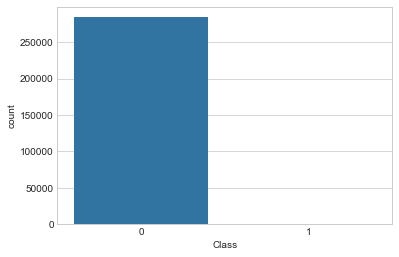

In [13]:
sns.countplot(y.Class);

In [14]:
t_val_count/y.shape[0] * 100

Class
0        99.827251
1         0.172749
dtype: float64

매우 큰 비율로 언벨런스한 타겟 분포를 가진 것을 알수 있다. 

* Time, Amount, V1~~ 이렇게 3개로 나누어 진다. 



Time은 아래와 같이 단지 발생 순서를 말해주는 것인듯으로 보여서 drop 한다.

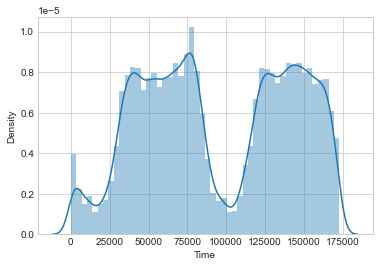

In [15]:
sns.distplot(X.Time);

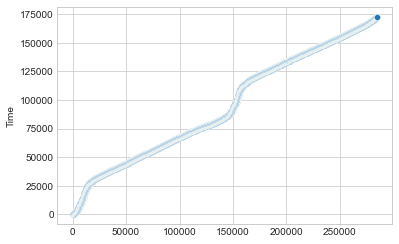

In [16]:
sns.scatterplot(y='Time', x= X.index, data=X );

실제로 feature 값이 무엇인지 알수 없지만, Time 의미가 없다.

In [17]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', inplace=True, axis=1)
    return df_copy

* Amount 는 오른쪽 꼬리의 분포를 가지고 있다. 
* 데이터 양이 많기 때문에 scatter로는 알수 없다. 

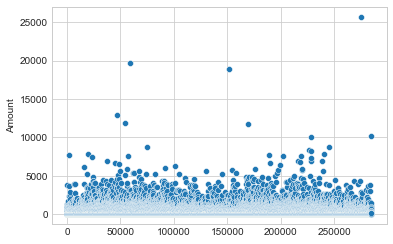

In [18]:
sns.scatterplot(y='Amount', x= X.index, data=X );

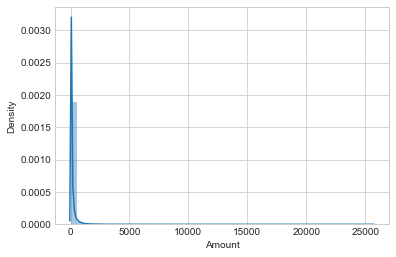

In [19]:
sns.distplot(X.Amount);

# 기본 모델 생성

In [20]:
X_train, X_test, y_train, y_test = get_train_test_dataset(X, y)

In [21]:
def get_model_train_eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    print(str(type(model)).split('.')[-1][:-2])
    get_clf_eval(y_test, pred, pred_proba)

LogisticRegression
오차 행렬


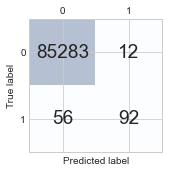

정확도:0.9992, 정밀도:0.8846, 재현율:0.6216, F1_score:0.7302,            AUC: 0.9599


In [22]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

get_model_train_eval(LogisticRegression(), X_train, y_train, X_test, y_test)

LGBMClassifier
오차 행렬


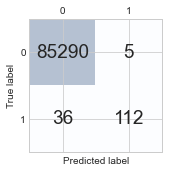

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9790


In [23]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
lgbm_model= LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_model, X_train, y_train, X_test, y_test)

# Amount 분포도 변환 후 모델 학습

<AxesSubplot:xlabel='Amount', ylabel='Density'>

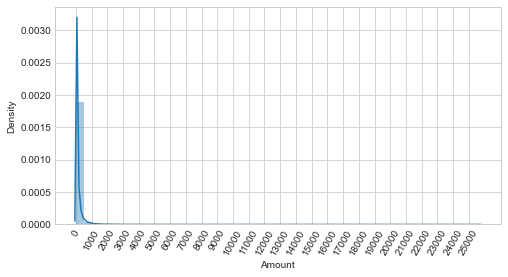

In [25]:
plt.figure(figsize=(8, 4))
plt.xticks(np.arange(X.Amount.min(), X.Amount.max(), 1000), rotation=60)
sns.distplot(X['Amount'])

## StandardScaler 적용

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_S = X.copy()
X_S['Amount_S'] = scaler.fit_transform(X_S['Amount'].values.reshape(-1, 1))

<AxesSubplot:xlabel='Amount_S', ylabel='Density'>

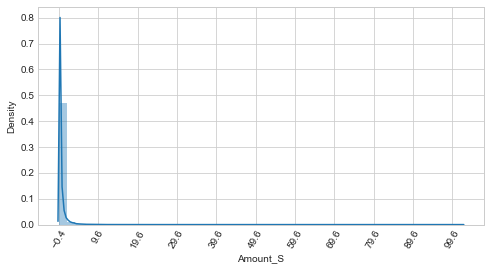

In [29]:
plt.figure(figsize=(8, 4))
plt.xticks(np.arange(X_S.Amount_S.min(), X_S.Amount_S.max(), 10), rotation=60)
sns.distplot(X_S['Amount_S'])

In [30]:
def get_preprocessed_df(df=None):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy['Amount_S'] = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

LogisticRegression
오차 행렬


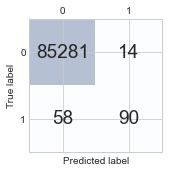

정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1_score:0.7143,            AUC: 0.9702
LGBMClassifier
오차 행렬


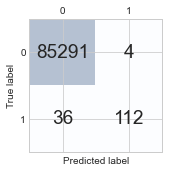

정확도:0.9995, 정밀도:0.9655, 재현율:0.7568, F1_score:0.8485,            AUC: 0.9782


In [31]:
X_train, X_test, y_train, y_test = get_train_test_dataset(X, y)

get_model_train_eval(LogisticRegression(), X_train, y_train, X_test, y_test)
get_model_train_eval(lgbm_model, X_train, y_train, X_test, y_test)

## minmaxscaler()

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_S = X.copy()
X_S['Amount_S'] = scaler.fit_transform(X_S['Amount'].values.reshape(-1, 1))

<AxesSubplot:xlabel='Amount_S', ylabel='Density'>

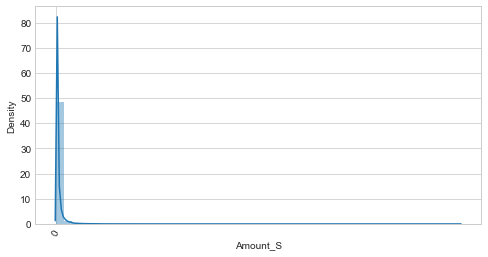

In [33]:
plt.figure(figsize=(8, 4))
plt.xticks(np.arange(X_S.Amount_S.min(), X_S.Amount_S.max(), 10), rotation=60)
sns.distplot(X_S['Amount_S'])

In [34]:
from sklearn.preprocessing import MinMaxScaler
def get_preprocessed_df(df=None):
    scaler = MinMaxScaler()
    df_copy = df.copy()
    df_copy['Amount_S'] = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

LogisticRegression
오차 행렬


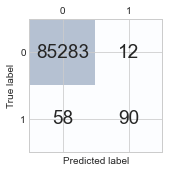

정확도:0.9992, 정밀도:0.8824, 재현율:0.6081, F1_score:0.7200,            AUC: 0.9713
LGBMClassifier
오차 행렬


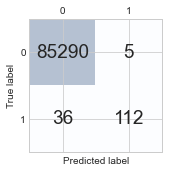

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9790


In [35]:
X_train, X_test, y_train, y_test = get_train_test_dataset(X, y)

get_model_train_eval(LogisticRegression(), X_train, y_train, X_test, y_test)
get_model_train_eval(lgbm_model, X_train, y_train, X_test, y_test)

## log scaler 이용

In [36]:
import numpy as np
X_S = X.copy()
X_S['Amount_S'] = np.log1p(X_S['Amount'].values.reshape(-1, 1))

<AxesSubplot:xlabel='Amount_S', ylabel='Density'>

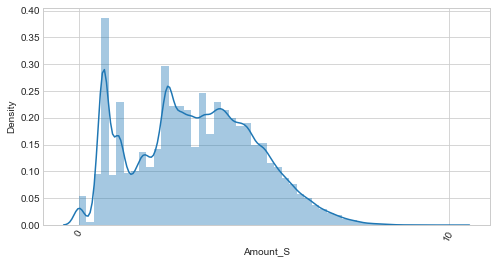

In [37]:
plt.figure(figsize=(8, 4))
plt.xticks(np.arange(X_S.Amount_S.min(), X_S.Amount_S.max(), 10), rotation=60)
sns.distplot(X_S['Amount_S'])

In [38]:
def get_preprocessed_df(df=None):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy['Amount_S'] = np.log1p(df_copy['Amount'].values.reshape(-1, 1))
    
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

LogisticRegression
오차 행렬


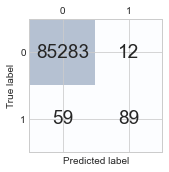

정확도:0.9992, 정밀도:0.8812, 재현율:0.6014, F1_score:0.7149,            AUC: 0.9727
LGBMClassifier
오차 행렬


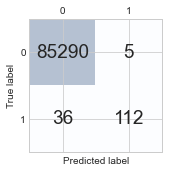

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9790


In [39]:
X_train, X_test, y_train, y_test = get_train_test_dataset(X, y)

get_model_train_eval(LogisticRegression(), X_train, y_train, X_test, y_test)
get_model_train_eval(lgbm_model, X_train, y_train, X_test, y_test)

# 이상치 데이터 제구 후 모델 학습/예측/평가

In [40]:
import seaborn as sns

<AxesSubplot:>

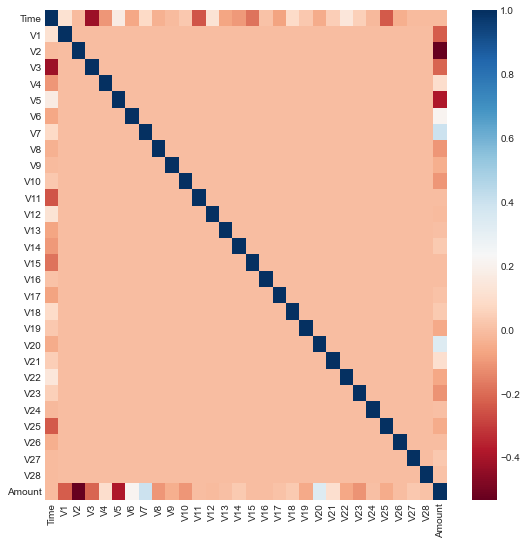

In [41]:
plt.figure(figsize = (9, 9))
corr = X.corr()
sns.heatmap(corr, cmap='RdBu')

In [42]:
import numpy as np

def get_outlier(df_X=None,df_y=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df_X[df_y['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

In [43]:
outlier_index = get_outlier(df_X=X, df_y=y, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [44]:
def get_preprocessed_df(df=None):
    global outlier_index
    
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy['Amount_S'] = np.log1p(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    
    return df_copy

In [45]:
def get_train_test_dataset(df_X=None, df_y=None, test_size=0.3, random_state=0):
    global outlier_index
    df_copy = get_preprocessed_df(df_X)
    df_y.drop(outlier_index,axis=0, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(df_copy, df_y, test_size=test_size, 
                                            random_state=random_state, stratify = df_y)
    
    return X_train, X_test, y_train, y_test
    
    

LogisticRegression
오차 행렬


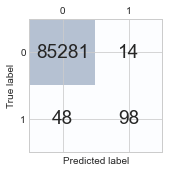

정확도:0.9993, 정밀도:0.8750, 재현율:0.6712, F1_score:0.7597,            AUC: 0.9743
LGBMClassifier
오차 행렬


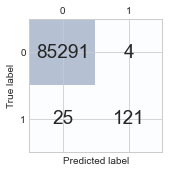

정확도:0.9997, 정밀도:0.9680, 재현율:0.8288, F1_score:0.8930,            AUC: 0.9791


In [46]:
X_train, X_test, y_train, y_test = get_train_test_dataset(X, y)

get_model_train_eval(LogisticRegression(), X_train, y_train, X_test, y_test)
get_model_train_eval(lgbm_model, X_train, y_train, X_test, y_test)

SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("SMOTE 적용 전 학습용 : ", X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 : ", X_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 :  (199362, 29) (199362, 1)
SMOTE 적용 후 학습용 :  (398040, 29) (398040, 1)


In [48]:
y_train_over.value_counts()

Class
1        199020
0        199020
dtype: int64

LogisticRegression
오차 행렬


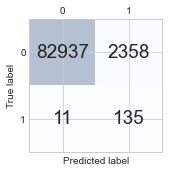

정확도:0.9723, 정밀도:0.0542, 재현율:0.9247, F1_score:0.1023,            AUC: 0.9737
LGBMClassifier
오차 행렬


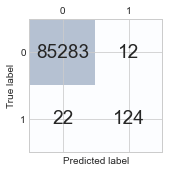

정확도:0.9996, 정밀도:0.9118, 재현율:0.8493, F1_score:0.8794,            AUC: 0.9814


In [49]:
get_model_train_eval(LogisticRegression(), X_train_over, y_train_over, X_test, y_test)
get_model_train_eval(lgbm_model, X_train_over, y_train_over, X_test, y_test)

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

시각화

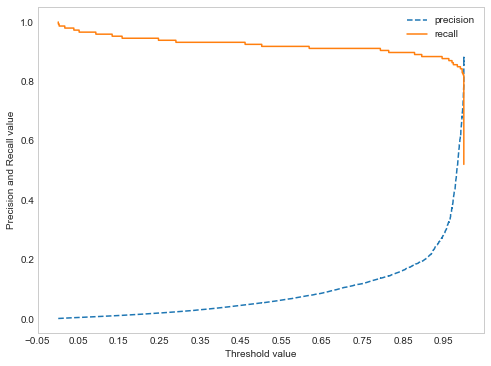

In [51]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_over, y_train_over)
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

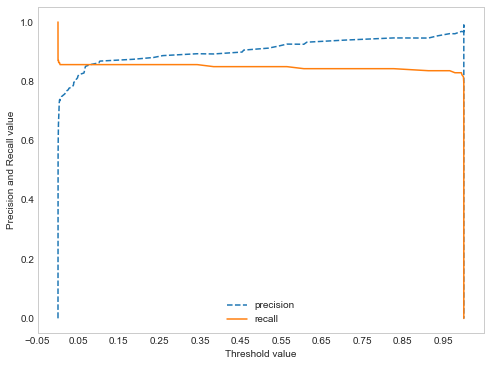

In [52]:
lgbm_model= LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_model.fit(X_train_over, y_train_over)
precision_recall_curve_plot(y_test, lgbm_model.predict_proba(X_test)[:, 1])

# 한꺼번에 정리한 모형, scaler 다양하게 정리해봄

In [53]:
import gdown
import os
import pandas as pd
from sklearn.model_selection import train_test_split
# https://drive.google.com/file/d/1TwKDZ24Gp76MhZFP4kRee2uAJYtYZLve/view?usp=sharing
def get_creditcard_dataset():

    google_path = 'https://drive.google.com/uc?id='
    file_id_train = '1TwKDZ24Gp76MhZFP4kRee2uAJYtYZLve'

    gdown.download(google_path+file_id_train,'creditcard.csv',quiet=False)
   
    
    X = pd.read_csv('creditcard.csv')
    y = X.iloc[:,[-1]]
    X = X.iloc[:,:-1]
    
    os.remove('creditcard.csv')

    
    return X, y

X, y = get_creditcard_dataset()

Downloading...
From: https://drive.google.com/uc?id=1TwKDZ24Gp76MhZFP4kRee2uAJYtYZLve
To: C:\Users\N\OneDrive\WorkJ\Machine Learning\Kaggle\CreditCardFraud\creditcard.csv
151MB [00:08, 17.7MB/s] 


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score

def plot_conf_mat(conf_mat):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center',fontsize=19)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    plot_conf_mat(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1_score:{3:.4f},\
            AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [55]:
def get_model_train_eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    print(str(type(model)).split('.')[-1][:-2])
    get_clf_eval(y_test, pred, pred_proba)

In [56]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf = LogisticRegression()
lgbm_model= LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

In [57]:
def get_train_test_dataset(df_X=None, df_y=None, scaler=None, test_size=0.3, random_state=0):
    df_copy = get_preprocessed_df(df_X, scaler)
    X_train, X_test, y_train, y_test = train_test_split(df_copy, df_y, test_size=test_size, 
                                            random_state=random_state, stratify = df_y)
    
    return X_train, X_test, y_train, y_test
    


In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
import numpy as np

scalers = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler(), 'log1p']

def get_preprocessed_df(df, scaler):
    df_copy = df.copy()
    if scaler=='log1p':
        df_copy['Amount_S'] = np.log1p(df_copy['Amount'].values.reshape(-1, 1))
    else:
        df_copy['Amount_S'] = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

Standard
LogisticRegression
오차 행렬


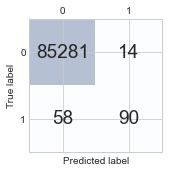

정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1_score:0.7143,            AUC: 0.9702
LGBMClassifier
오차 행렬


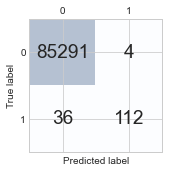

정확도:0.9995, 정밀도:0.9655, 재현율:0.7568, F1_score:0.8485,            AUC: 0.9782
MinMax
LogisticRegression
오차 행렬


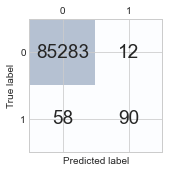

정확도:0.9992, 정밀도:0.8824, 재현율:0.6081, F1_score:0.7200,            AUC: 0.9713
LGBMClassifier
오차 행렬


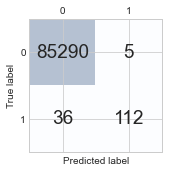

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9790
MaxAbs
LogisticRegression
오차 행렬


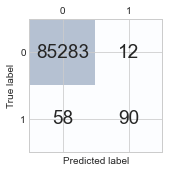

정확도:0.9992, 정밀도:0.8824, 재현율:0.6081, F1_score:0.7200,            AUC: 0.9713
LGBMClassifier
오차 행렬


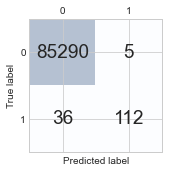

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9790
Robust
LogisticRegression
오차 행렬


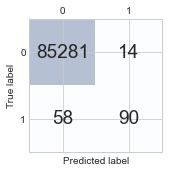

정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1_score:0.7143,            AUC: 0.9702
LGBMClassifier
오차 행렬


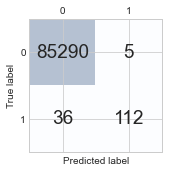

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9791
log1p
LogisticRegression
오차 행렬


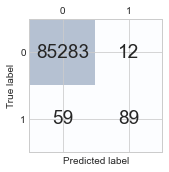

정확도:0.9992, 정밀도:0.8812, 재현율:0.6014, F1_score:0.7149,            AUC: 0.9727
LGBMClassifier
오차 행렬


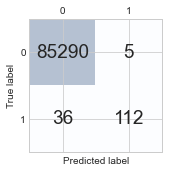

정확도:0.9995, 정밀도:0.9573, 재현율:0.7568, F1_score:0.8453,            AUC: 0.9790


In [59]:
for scaler in scalers:
    
    X_train, X_test, y_train, y_test = get_train_test_dataset(X, y,  scaler)
    if scaler == 'log1p':
        print('log1p')
    else:
        print(str(type(scaler)).split('.')[-1][:-2][:-len('Scaler')])
    get_model_train_eval(lr_clf, X_train, y_train, X_test, y_test)
    get_model_train_eval(lgbm_model, X_train, y_train, X_test, y_test)

**Reference**

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>

* 파이썬 머신러닝 완벽 가이드, 권철민